In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [67]:
from sklearn.datasets import load_boston
data = load_boston(return_X_y=True)
dataCon = np.concatenate((data[0],np.ones((506, 1)),(data[1])[:,None]), axis=1)

In [162]:
print(dataCon.shape)
X = dataCon[:,:-1]
b = dataCon[:,-1][:,None]

LS = lambda X,b: np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), X.transpose()),b)

Y = LS(X,b)
print(Y)

pred = np.matmul(X, Y)
error = math.pow(np.linalg.norm(pred - b,2),2)/X.shape[0]
print(error)

(506, 15)
[[-1.07170557e-01]
 [ 4.63952195e-02]
 [ 2.08602395e-02]
 [ 2.68856140e+00]
 [-1.77957587e+01]
 [ 3.80475246e+00]
 [ 7.51061703e-04]
 [-1.47575880e+00]
 [ 3.05655038e-01]
 [-1.23293463e-02]
 [-9.53463555e-01]
 [ 9.39251272e-03]
 [-5.25466633e-01]
 [ 3.64911033e+01]]
21.897779217687493


In [164]:
perm0 = np.random.permutation(dataCon.shape[0])
k1, k2, k3, k4, k5,_ = np.array(np.split(dataCon[perm0],[101,202,303,404,600]))

print(k5.shape)

(102, 15)


Errors: [23.278309284976704, 17.65801676839418, 24.46802843554899, 29.976142240663197, 23.509109586007717]
Mean: 23.777921263118156
Variation 15.33385881338319


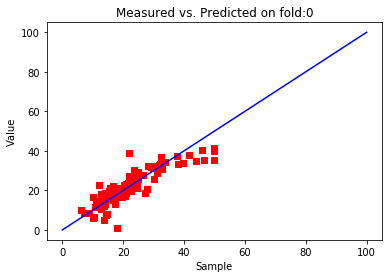

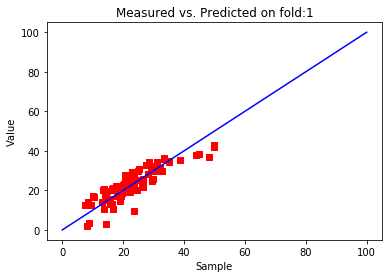

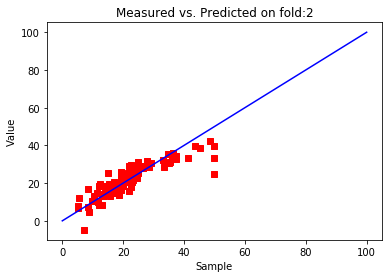

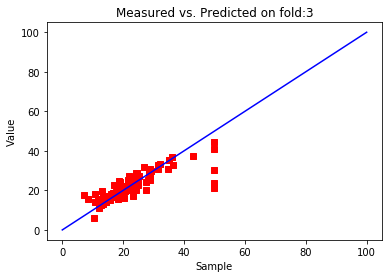

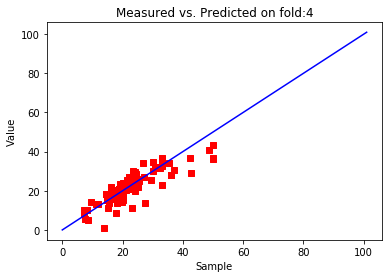

In [165]:
listarrays = [k1,k2,k3,k4,k5]
errorMCC = []
preds = []
actuals = []
for i in [0, 1, 2, 3, 4]:
    arr = listarrays[i]
    #print(arr[:,-1])
    del listarrays[i]
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in listarrays:
        training = np.concatenate((training,a),axis=0)
    X = training[:,:-1]
    b = training[:,-1][:,None]
    Y = LS(X,b)
    #Y = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), X.transpose()),b)
    pred = np.matmul(arr[:,:-1], Y)
    error = math.pow(np.linalg.norm(pred - arr[:,-1][:,None], 2),2)/pred.shape[0]
    fig = plt.figure()
    f = fig.add_subplot(111)
    f.set_title('Measured vs. Predicted on fold:'+str(i))
    f.set_xlabel('Sample')
    f.set_ylabel('Value')

    f.scatter(arr[:,-1][:,None], pred, color='r', marker='s')
    f.plot(np.arange(pred.shape[0]),np.arange(pred.shape[0]), 'b-')
    errorMCC.append(error)
    listarrays = [k1,k2,k3,k4,k5]
print('Errors:', errorMCC)
print('Mean:', np.mean(errorMCC))
print('Variation', math.pow(np.std(errorMCC),2))


In [157]:
lvals = np.linspace(0,1,300)
RR = lambda X,b,l: np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X) + l*np.identity(X.shape[1])), X.transpose()),b)

In [166]:
listarrays = [k1,k2,k3,k4,k5]
errorMCC = []
minerror = np.inf
optl = lvals[0]
for l in lvals:
    for i in [0, 1, 2, 3, 4]:
        arr = listarrays[i]
        #print(arr[:,-1])
        del listarrays[i]
        del listarrays[i%4]
        training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
        for a in listarrays:
            training = np.concatenate((training,a),axis=0)
        X = training[:,:-1]
        b = training[:,-1][:,None]
        Y = RR(X,b,l)
        #Y = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X) + l*np.identity(X.shape[1])), X.transpose()),b)
        pred = np.matmul(arr[:,:-1], Y)
        error = math.pow(np.linalg.norm(pred - arr[:,-1][:,None], 2),2)/pred.shape[0]

        errorMCC.append(error)
        if error < minerror:
            minerror = error
            optl = l
        listarrays = [k1,k2,k3,k4,k5]
#print('Errors:', errorMCC)
#print('Mean:', np.mean(errorMCC))
#print('Variation', math.pow(np.std(errorMCC),2))
print('Best lamda value:', optl)

Best lamda value: 0.056856187290969896


In [167]:
errorMCC = []
for i in [0, 1, 2, 3, 4]:
        arr = listarrays[i]
        del listarrays[i]
        training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
        for a in listarrays:
            training = np.concatenate((training,a),axis=0)
        X = training[:,:-1]
        b = training[:,-1][:,None]
        Y = RR(X,b,l)
        #Y = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X) + l*np.identity(X.shape[1])), X.transpose()),b)
        pred = np.matmul(arr[:,:-1], Y)
        error = math.pow(np.linalg.norm(pred - arr[:,-1][:,None], 2),2)/pred.shape[0]

        errorMCC.append(error)
        listarrays = [k1,k2,k3,k4,k5]

print('Errors:', errorMCC)
print('Mean:', np.mean(errorMCC))
print('Variation', math.pow(np.std(errorMCC),2))

Errors: [25.421393477758507, 17.41896388263866, 25.873473165430205, 31.866578251724054, 23.50469411686712]
Mean: 24.81702057888371
Variation 21.526213134996485
